**4.	Is there a difference in the number of wins based on hostage?**

Importing required libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

Reading requierd tables

In [21]:
MatchEventInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchEventInfo.csv')
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')

**Calculating number of players'win**

droping duplicated data

In [22]:
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')
MatchEventInfo_dd = MatchEventInfo.drop_duplicates ()

Merging the tables

In [23]:
merged_HW = MatchHomeTeamInfo_dd[['match_id' ,
                                  'player_id']].merge(MatchAwayTeamInfo_dd[['match_id' ,
                                                                            'player_id']],
                                                                             on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_HW[['match_id' ,
                        'player_id_x' , 'player_id_y']].merge(MatchEventInfo_dd[['match_id',
                                                                                 'winner_code']],
                                                                                  on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_EHW.dropna()
merged_EHW.head()

,match_id,player_id_x,player_id_y,winner_code
0,12260075,14486,254742,2.0
1,12260076,206570,90080,1.0
2,12260077,46391,275923,2.0
3,12260078,106755,275923,1.0
5,12260080,221012,57163,1.0


Mapping the winner_code values

In [24]:
merged_EHW['winner_id'] = merged_EHW.apply( lambda x : x['player_id_x']  if x['winner_code']==1 else x['player_id_y'] , axis = 1)

In [25]:
merged_EHW.head()

,match_id,player_id_x,player_id_y,winner_code,winner_id
0,12260075,14486,254742,2.0,254742.0
1,12260076,206570,90080,1.0,206570.0
2,12260077,46391,275923,2.0,275923.0
3,12260078,106755,275923,1.0,106755.0
5,12260080,221012,57163,1.0,221012.0


Creating a data frame to show the number of player's win

In [ ]:
player = pd.concat ([MatchHomeTeamInfo[['player_id', 'name']] , 
                     MatchAwayTeamInfo[['player_id', 'name']]]).drop_duplicates(subset = 'player_id')
player['no_win_home'] = 0
player['no_win_away'] = 0
for no in player['player_id']:
    player['no_win_home'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[(merged_EHW['winner_id'] == no)&
                                                                                      (merged_EHW['winner_code'] == 1)].count()
    player['no_win_away'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[(merged_EHW['winner_id'] == no)&
                                                                                      (merged_EHW['winner_code'] == 2)].count()

In [28]:
player.head()

,player_id,name,no_win_home,no_win_away
0,14486,Nadal R.,0,1
1,206570,Sinner J.,1,2
2,46391,Struff J.,1,0
3,106755,Rublev A.,1,3
4,221012,Cerundolo F.,2,0


Ploting distribution of number of wins based on hastage

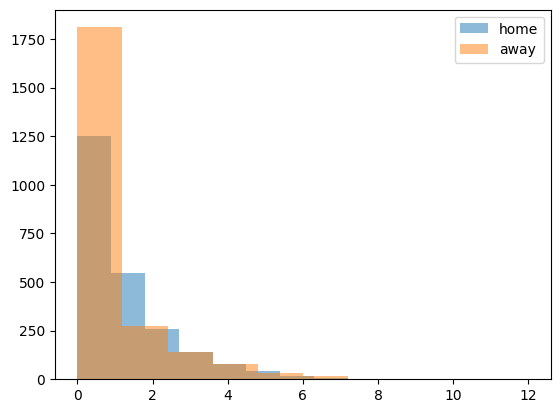

In [42]:
plt.hist(player['no_win_home'],alpha=0.5)
plt.hist(player['no_win_away'], alpha=0.5)
plt.legend(['home', 'away'])
plt.show()

****Two sample Test****

In [ ]:
t_statistic, p_value = stats.ttest_ind (player['no_win_home'], player['no_win_home'])
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print ('Samples shows significant difference (reject H0)')
    print ('so there is significant difference the number of wins based on hostage')
else:
    print ( 'Samples dose not show significant difference  (fail to reject H0)')
    print ('so there is not significant difference the number of wins based on hostage')

In [ ]:
group_data = MatchEventInfo_dd.groupby(['winner_code'])['match_id'].count() / 
group_data